In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
start = datetime.datetime(1982,12, 31)
end = datetime.datetime(2023, 12, 31)

In [3]:
SP500 = yf.download('^GSPC', start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
SP500.to_csv('SP500.csv')

In [5]:
#SP500 = pd.read_csv('SP500.csv')

In [6]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000


In [7]:
SP500['Adj Close'].head()

Date
1982-12-31    140.639999
1983-01-03    138.339996
1983-01-04    141.360001
1983-01-05    141.960007
1983-01-06    145.270004
Name: Adj Close, dtype: float64

In [8]:
SP500['Adj Close'].tail()

Date
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: Adj Close, dtype: float64

Calcoliamo i rendimenti semplici lordi e netti e logaritmici

In [9]:
SP500['RS_Lordo'] = SP500['Adj Close']/SP500['Adj Close'].shift(1)

In [10]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo
Date,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316


In [11]:
SP500['RS_Netto'] = SP500['Adj Close'].pct_change(1)

In [12]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto
Date,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316


In [13]:
SP500['RL'] = np.log(SP500['Adj Close']/SP500['Adj Close'].shift(1))

In [14]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL
Date,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354,-0.016489
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830,0.021595
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245,0.004236
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316,0.023049


Qual é il collegamento fra rendimenti semplici e logaritmici.
Aumentando la frequenza di capitalizzazione il rendimento composto semplice si avvicina a quello logaritmico.


In [15]:
f = [1, 2, 4, 12, 52, 365, 730, 1460]
r = 0.10
tassi = []

for i in f:
    tasso = (1+r/i)**i - 1
    tassi.append(tasso)

for i in tassi:
    print(round(i, 7))

print(round(np.exp(r)-1, 7))

0.1
0.1025
0.1038129
0.1047131
0.1050648
0.1051558
0.1051633
0.1051671
0.1051709


Differenze fra rendimenti semplici e logaritmici

o	Rendimenti semplici non si sommano nel tempo, logaritmici sì

o	Rendimenti semplici si sommano nel portafoglio, logaritmici no

o	Rendimenti semplici sono sensibili alla frequenza di calcolo, logaritmici no


Il prodotto dei rendimenti lordi è il valore capitalizzato dell'investimento di una unità al rendimento della serie

In [16]:
SP500['Cum'] = np.cumprod(SP500['RS_Lordo'])

In [17]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354,-0.016489,0.983646
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830,0.021595,1.005119
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245,0.004236,1.009386
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316,0.023049,1.032921


In [18]:
SP500.tail()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,1.001660,0.001660,0.001659,33.807095
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,1.004232,0.004232,0.004223,33.950157
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,1.001430,0.001430,0.001429,33.998721
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000,1.000370,0.000370,0.000370,34.011306
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000,0.997174,-0.002826,-0.002830,33.915174


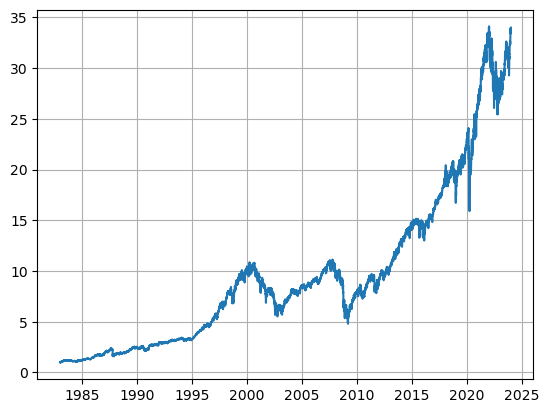

In [19]:
plt.plot(SP500['Cum'])
plt.grid()

In [20]:
SP500['Adj Close'][-1]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_19088\4204004827.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SP500['Adj Close'][-1]


4769.830078125

In [21]:
SP500['Adj Close'][0]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_19088\2756053230.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SP500['Adj Close'][0]


140.63999938964844

In [22]:
SP500['Adj Close'][0]*SP500['Cum'][-1]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_19088\356560320.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SP500['Adj Close'][0]*SP500['Cum'][-1]


4769.83007812502

In [23]:
SP500['Adj Close'][-1]/SP500['Adj Close'][0]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_19088\305833786.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SP500['Adj Close'][-1]/SP500['Adj Close'][0]


33.915174195287115

In [24]:
SP500['Cum'][-1]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_19088\3600709315.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SP500['Cum'][-1]


33.91517419528726

Calcoliamo il rendimento composto annuo dell'investimento sul periodo considerato

In [25]:
from datetime import timedelta

In [26]:
delta = end - start
delta.days

14975

In [27]:
t = delta/datetime.timedelta(days=1)

In [28]:
t

14975.0

In [29]:
type(t)

float

Giorni esatti

In [30]:
t/365

41.02739726027397

In [31]:
SP500_cagr = (SP500['Adj Close'][-1]/SP500['Adj Close'][0])**(365/t) -1
SP500_cagr

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_19088\453607819.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SP500_cagr = (SP500['Adj Close'][-1]/SP500['Adj Close'][0])**(365/t) -1


0.08968697093262445

Approssimazione 41 anni

In [32]:
SP500['Cum'][-1]**(1/41) - 1

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_19088\913035711.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SP500['Cum'][-1]**(1/41) - 1


0.08974951447728596

Per avere una serie più maneggevole passiamo da una frequenza giornaliera a una frequenza mensile.
Utilizzamo il metodo "groupby" e la frequenza mensile ('M'). Poichè vogliamo il valore di fine mese specifichiamo ".last()".
Attenzione: nelle analisi di serie storiche utilizzare sempre valori osservati (giorni, fine settimana, fine mese eccetera) mai medie (".mean()") perché creiamo valori che non corrispondono a veri investimenti e riduciamo artificiosamente la volatilità

In [35]:
SP500_m = SP500.groupby(pd.Grouper(freq='M')).last() #aggregazione mensile
SP500_m.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-31,144.509995,145.300003,143.929993,145.300003,145.300003,67140000,1.005467,0.005467,0.005452,1.033134
1983-02-28,149.740005,149.740005,147.809998,148.059998,148.059998,83750000,0.988781,-0.011219,-0.011283,1.052759
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,0.997197,-0.002803,-0.002807,1.087600
1983-04-30,162.970001,164.429993,162.720001,164.429993,164.429993,105750000,1.009083,0.009083,0.009042,1.169155


In [36]:
SP500_m['RS_Lordo']=SP500_m['Adj Close']/SP500_m['Adj Close'].shift(1)

In [37]:
SP500_m['RS_Netto'] = SP500_m['Adj Close'].pct_change(1)

In [38]:
SP500_m['RL']= np.log(SP500_m['Adj Close']/SP500_m['Adj Close'].shift(1))

In [39]:
SP500_m.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-31,144.509995,145.300003,143.929993,145.300003,145.300003,67140000,1.033134,0.033134,0.032597,1.033134
1983-02-28,149.740005,149.740005,147.809998,148.059998,148.059998,83750000,1.018995,0.018995,0.018817,1.052759
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,1.033095,0.033095,0.032559,1.087600
1983-04-30,162.970001,164.429993,162.720001,164.429993,164.429993,105750000,1.074987,0.074987,0.072308,1.169155


In [40]:
SP500_m['Adj Close'][-1]/SP500_m['Adj Close'][0]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_19088\2070711178.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SP500_m['Adj Close'][-1]/SP500_m['Adj Close'][0]


33.915174195287115

Prima differenza: Rendimenti semplici non si sommano nel tempo, logaritmici sì
Se prendiamo il rendimento semplice medio e lo capitalizziamo per il numero di periodi (41 anni per 12 mesi = 492) otteniamo un valore finale miolto più elevato di quello corretto.
Se facciamo la stessa cosa con il rendimento logaritmico medio otteniamo il valore corretto.

In [41]:
RS_Netto_m = np.mean(SP500_m['RS_Netto'])
RS_Netto_m

0.008156658344535056

In [42]:
RL_m = np.mean(SP500_m['RL'])
RL_m

0.0071623222166996535

In [43]:
(1+RS_Netto_m)**(41*12)

54.423591010684014

In [44]:
np.exp(RL_m*41*12)

33.91517419528715

Possiamo passare da rendimenti semplici a rendimenti logaritmici grazie a un risultato ricavato dal cosiddetto Lemma di Ito per il quale RL = RS - 0.5*Var(RS)

In [45]:
RS_Netto_var = np.var(SP500_m['RS_Netto'])

In [46]:
RS_Netto_m - 0.5*RS_Netto_var

0.0072030306685217935

Rendimenti e portafogli

La media ponderata dei rendimenti semplici delle componenti di un portafoglio è uguale al rendimento del portafoglio

In [47]:
weights = np.array([0.2,0.5,0.3])

In [48]:
inizio = np.array([100, 100, 100])

In [49]:
port_inizio = np.sum(weights*inizio)
port_inizio

100.0

In [50]:
fine = np.array([102,105,115])

In [51]:
ret_s = fine/inizio -1

In [52]:
ret_s

array([0.02, 0.05, 0.15])

In [53]:
port_fine_s = np.sum(weights*fine)
port_fine_s

107.4

In [54]:
ret_port = np.sum(weights*ret_s)
ret_port

0.074

In [55]:
port_fine_s_check = port_inizio * (1+ret_port)
port_fine_s_check

107.4

In [56]:
port_fine_s == port_fine_s_check

True

La media ponderata dei rendimenti logaritmici delle componenti di un portafoglio è diversa dal rendimento logaritmico del portafoglio

In [57]:
ret_l = np.log(fine/inizio)
ret_l

array([0.01980263, 0.04879016, 0.13976194])

In [58]:
ret_pond_log = np.sum(ret_l*weights)
ret_pond_log

0.07028419025649955

In [59]:
ret_port_log = np.log(107.4/100)
ret_port_log

0.071389996086673

In [60]:
ret_port_log == ret_pond_log

False

#### Valori finali di un percorso di accumulazione e distribuzione log normale


In [62]:
ret = RS_Netto_m
ret

0.008156658344535056

In [63]:
std = np.sqrt(RS_Netto_var)
std

0.043672134731731684

Creaimo 10000 percorsi di investimento mensili per 10 anni utilizzando media e deviazione standard storiche del S&P500 con un metodo chiamato simulazione MonteCarlo

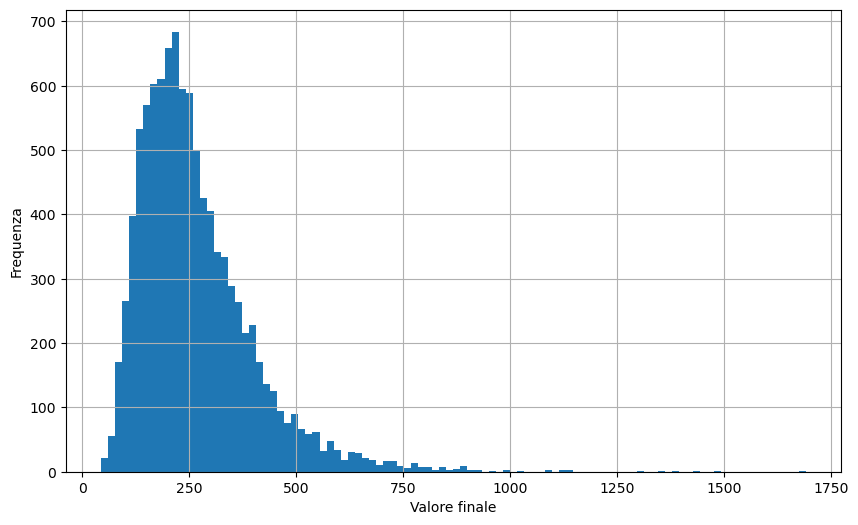

In [64]:
n = 10000
T = 120
Port = np.zeros((T+1, n))
Port[0] = 100
for t in range(1, T+1):
    Port[t] = Port[t-1]*(1+ (ret + std*np.random.randn(n)))

plt.figure(figsize = (10,6))
plt.hist(Port[-1], bins = 100)
plt.xlabel('Valore finale')
plt.ylabel('Frequenza')
plt.grid()


In [65]:
port_log = np.log(Port[-1])

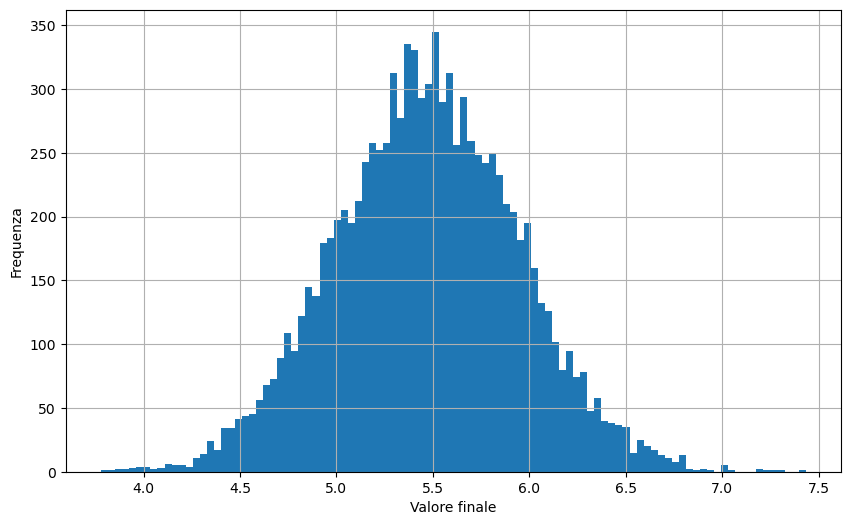

In [66]:
plt.figure(figsize = (10,6))
plt.hist(port_log, bins = 100)
plt.xlabel('Valore finale')
plt.ylabel('Frequenza')
plt.grid()
